<a href="https://colab.research.google.com/github/RylleLang/MANTARING_RYLLE_AIRO_CPE311N/blob/main/Copy_of_Hands_on_Activity_8_1_Aggregating_Data_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Activity 8.1: Aggregating Data with Pandas

**8.1.1 Intended Learning Outcomes**

 After this activity, the student should be able to:




*   Demonstrate querying and merging of dataframes
*   Perform advanced calculations on dataframes
*   Aggregate dataframes with pandas and numpy
*   Work with time series data


 **8.1.2 Resources**



*   Computing Environment using Python 3.x
*   Attached Datasets (under Instructional Materials)


**8.1.3 Procedures**

The procedures can be found in the canvas module. Check the following under topics:


*   8.1 Weather Data Collection
*   8.2 Querying and Merging
*   8.3 Dataframe Operations
*   8.4 Aggregations

In [201]:
import pandas as pd
import numpy as np

earth = '/content/earthquakes.csv' #LOCATING THE CSV FILE
faang = '/content/faang.csv'


earthdata = pd.read_csv(earth) #READ THE CSV FILE
faangdata = pd.read_csv(faang)

edata = pd.DataFrame(earthdata)
fdata = pd.DataFrame(faangdata)


In [203]:
edata

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


In [202]:
fdata

,ticker,date,open,high,low,close,volume
0,FB,2018-01-02,177.68,181.58,177.55,181.42,18151903
1,FB,2018-01-03,181.88,184.78,181.33,184.67,16886563
2,FB,2018-01-04,184.90,186.21,184.10,184.33,13880896
3,FB,2018-01-05,185.59,186.90,184.93,186.85,13574535
4,FB,2018-01-08,187.20,188.90,186.33,188.28,17994726
...,...,...,...,...,...,...,...
1250,GOOG,2018-12-24,973.90,1003.54,970.11,976.22,1590328
1251,GOOG,2018-12-26,989.01,1040.00,983.00,1039.46,2373270
1252,GOOG,2018-12-27,1017.15,1043.89,997.00,1043.88,2109777
1253,GOOG,2018-12-28,1049.62,1055.56,1033.10,1037.08,1413772


In [205]:
merge_data = pd.concat([edata, fdata]) # TO MERGE THE 2 CSV FILES I USE CONCAT


In [206]:
merge_data

,mag,magType,time,place,tsunami,parsed_place,ticker,date,open,high,low,close,volume
0,1.35,ml,1539475168010.00,"9km NE of Aguanga, CA",0.00,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.29,ml,1539475129610.00,"9km NE of Aguanga, CA",0.00,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.42,ml,1539475062610.00,"8km NE of Aguanga, CA",0.00,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44,ml,1539474978070.00,"9km NE of Aguanga, CA",0.00,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.16,md,1539474716050.00,"10km NW of Avenal, CA",0.00,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,NaN,NaN,NaN,NaN,NaN,NaN,GOOG,2018-12-24,973.90,1003.54,970.11,976.22,1590328.00
1251,NaN,NaN,NaN,NaN,NaN,NaN,GOOG,2018-12-26,989.01,1040.00,983.00,1039.46,2373270.00
1252,NaN,NaN,NaN,NaN,NaN,NaN,GOOG,2018-12-27,1017.15,1043.89,997.00,1043.88,2109777.00
1253,NaN,NaN,NaN,NaN,NaN,NaN,GOOG,2018-12-28,1049.62,1055.56,1033.10,1037.08,1413772.00


In [ ]:
means = merge_data.loc[:, ['high','low']].mean(axis=0)

means

high    695.272838
low     677.693621
dtype: float64

In [ ]:
means2 = merge_data.loc[:, ['open','close']].mean(axis=0)

means2

open     687.148081
close    686.547753
dtype: float64

In [ ]:
total_time = merge_data[['high', 'low', 'open', 'close']].sum(axis=0)
print(list(round(total_time, 2)))

[872567.41, 850505.49, 862370.84, 861617.43]


In [ ]:
means3 = merge_data[['volume']].mean()
means3

volume    1.611439e+07
dtype: float64

In [ ]:
country = len([v for v in merge_data['place'] if v == '9km NE of Aguanga, CA']) # to count specific place
print(country)

264


In [ ]:
country2 = len([v for v in merge_data['place'] if v == '10km NW of Avenal, CA']) # to count specific place
print(country2)


1


In [ ]:
country3 = len([v for v in merge_data['parsed_place'] if v == 'California']) # to count specific place
print(country3)

2861


In [ ]:
total_time = merge_data['high'] + merge_data['low'] // merge_data['open'] + merge_data['close']
print([round(x, 2) for x in total_time])

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

# Collecting weather data from an API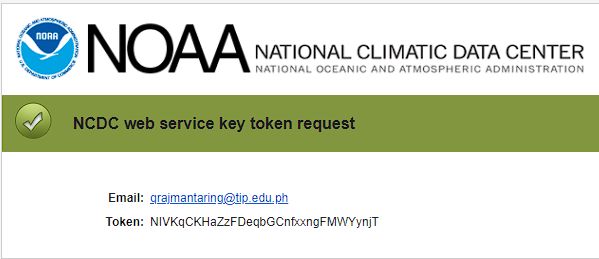

In [2]:
import requests
def make_request(endpoint, payload=None):
    """
    Make a request to a specific endpoint on the weather API
    passing headers and optional payload.

    Parameters:
        - endpoint: The endpoint of the API you want to
                    make a GET request to.
        - payload: A dictionary of data to pass along
                   with the request.

    Returns:
        Response object.
    """
    return requests.get(
        f'https://www.ncdc.noaa.gov/cdo-web/api/v2/{endpoint}',
        headers={
            'token': 'NIVKqCKHaZzFDeqbGCnfxxngFMWYynjT'
        },
        params=payload
    )

In [19]:
import requests
import datetime
from IPython import display

def make_request(endpoint, payload=None):
    url = f'https://www.ncdc.noaa.gov/cdo-web/api/v2/{endpoint}'
    headers = {'token': 'NIVKqCKHaZzFDeqbGCnfxxngFMWYynjT'}

    try:
        response = requests.get(url, headers=headers, params=payload)
        response.raise_for_status()  # Raise an error for non-2xx status codes
        return response
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None

current = datetime.date(2024, 1, 1)
end = datetime.date(2024, 5, 2)
results = []

while current < end:
    display.clear_output(wait=True)
    display.display(f'Gathering data for {str(current)}')

    start_date_str = current.strftime('%Y-%m-%d')
    end_date_str = start_date_str

    response = make_request(
        'data',
        {
            'datasetid': 'GHCND',
            'locationid': 'CITY:US360019',  # NYC
            'startdate': start_date_str,
            'enddate': end_date_str,
            'units': 'metric',
            'limit': 1000  # max allowed
        }
    )

    if response and response.ok:
        results.extend(response.json().get('results', []))

    current += datetime.timedelta(days=1)

'Gathering data for 2024-05-01'

In [20]:
import pandas as pd
df = pd.DataFrame(results)
df.head()

,date,datatype,station,attributes,value
0,2024-01-01T00:00:00,PRCP,GHCND:US1NJBG0003,",,N,0730",0.0
1,2024-01-01T00:00:00,SNOW,GHCND:US1NJBG0003,",,N,0730",0.0
2,2024-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,0800",1.0
3,2024-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,"T,,N,0730",0.0
4,2024-01-01T00:00:00,PRCP,GHCND:US1NJBG0018,"T,,N,0900",0.0


In [41]:
df.to_csv('nyc_weather_2018.csv', index=False)

In [40]:
import sqlite3
with sqlite3.connect('weather.db') as connection:
  df.to_sql(
      'nyc_weather_2018.csv', connection, index=False, if_exists='replace'
  )

In [42]:
response = make_request(
  'stations',
   {
      'datasetid' : 'GHCND', # Global Historical Climatology Network - Daily (GHCND) dataset
       'locationid' : 'CITY:US360019', # NYC
       'limit' : 1000 # max allowed
   }
)
stations = pd.DataFrame(response.json()['results'])[['id', 'name', 'latitude', 'longitude', 'elevation']]
stations.to_csv('nyc_weather_2018.csv', index=False)
with sqlite3.connect('weather.db') as connection:
 stations.to_sql(
 'stations', connection, index=False, if_exists='replace'
 )

# Database-style Operations on Dataframes

In [43]:
import pandas as pd
weather = pd.read_csv('nyc_weather_2018.csv')
weather.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


In [44]:
snow_data = weather.query('name == "STAMFORD 2.6 SSW, CT US" and elevation > 0')
snow_data.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.0641,-73.577,36.6


In [76]:
import sqlite3
with sqlite3.connect('weather.db') as connection:
 snow_data_from_db = pd.read_sql(
 'SELECT * FROM weather WHERE datatype == "SNOW" AND value > 0', connection)
 snow_data.reset_index().drop(columns='index').equals(snow_data_from_db)

In [77]:
weather[(weather.name == 'STAMFORD 2.6 SSW, CT US') & (weather.elevation > 0)].equals(snow_data)

True

In [78]:
station_info = pd.read_csv('weather_stations.csv')
station_info.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.0641,-73.5770,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.0378,-73.5682,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.9213,-74.0020,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.9027,-74.0834,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.9147,-73.9775,21.6


In [79]:
weather.head()

,id,name,latitude,longitude,elevation
0,GHCND:US1CTFR0022,"STAMFORD 2.6 SSW, CT US",41.064100,-73.577000,36.6
1,GHCND:US1CTFR0039,"STAMFORD 4.2 S, CT US",41.037788,-73.568176,6.4
2,GHCND:US1NJBG0001,"BERGENFIELD 0.3 SW, NJ US",40.921298,-74.001983,20.1
3,GHCND:US1NJBG0002,"SADDLE BROOK TWP 0.6 E, NJ US",40.902694,-74.083358,16.8
4,GHCND:US1NJBG0003,"TENAFLY 1.3 W, NJ US",40.914670,-73.977500,21.6


In [80]:
station_info.id.describe()

count                   262
unique                  262
top       GHCND:US1CTFR0022
freq                      1
Name: id, dtype: object

In [81]:
weather.id.describe()

count                   320
unique                  320
top       GHCND:US1CTFR0022
freq                      1
Name: id, dtype: object

In [82]:
station_info.shape[0], weather.shape[0]

(262, 320)

In [63]:
def get_row_count(*dfs):
  return [df.shape[0] for df in dfs]
get_row_count(station_info, weather)

[262, 320]

In [84]:
def get_info(attr, *dfs):
 return list(map(lambda x: getattr(x, attr), dfs))
get_info('shape', station_info, weather)

[(262, 5), (320, 5)]

# DataFrame Operations


In [88]:
import numpy as np
import pandas as pd
weather = pd.read_csv('nyc_weather_2018.csv', parse_dates=['date'])
weather.head()

,attributes,datatype,date,station,value
0,",,N,",PRCP,2018-01-01,GHCND:US1CTFR0039,0.0
1,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0015,0.0
2,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0015,0.0
3,",,N,",PRCP,2018-01-01,GHCND:US1NJBG0017,0.0
4,",,N,",SNOW,2018-01-01,GHCND:US1NJBG0017,0.0


In [89]:
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [90]:
fb.assign(
 abs_z_score_volume=lambda x: x.volume.sub(x.volume.mean()).div(x.volume.std()).abs()
 ).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [91]:
fb.assign(
 volume_pct_change=fb.volume.pct_change(),
 pct_change_rank=lambda x: x.volume_pct_change.abs().rank(
 ascending=False
 )
 ).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [92]:
fb['2018-01-11':'2018-01-12']

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


In [93]:
(fb > 215).any()

open       True
high       True
low       False
close      True
volume     True
dtype: bool

In [94]:
(fb > 215).any()

open       True
high       True
low       False
close      True
volume     True
dtype: bool

In [95]:
(fb.volume.value_counts() > 1).sum()

0

In [96]:
volume_binned = pd.cut(fb.volume, bins=3, labels=['low', 'med', 'high'])
volume_binned.value_counts()

low     240
med       8
high      3
Name: volume, dtype: int64

In [97]:
fb[volume_binned == 'high'].sort_values(
 'volume', ascending=False
 )

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


In [98]:
fb['2018-07-25':'2018-07-26']

,open,high,low,close,volume
date,,,,,
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


In [99]:
fb['2018-03-16':'2018-03-20']

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


In [100]:
import matplotlib.pyplot as plt

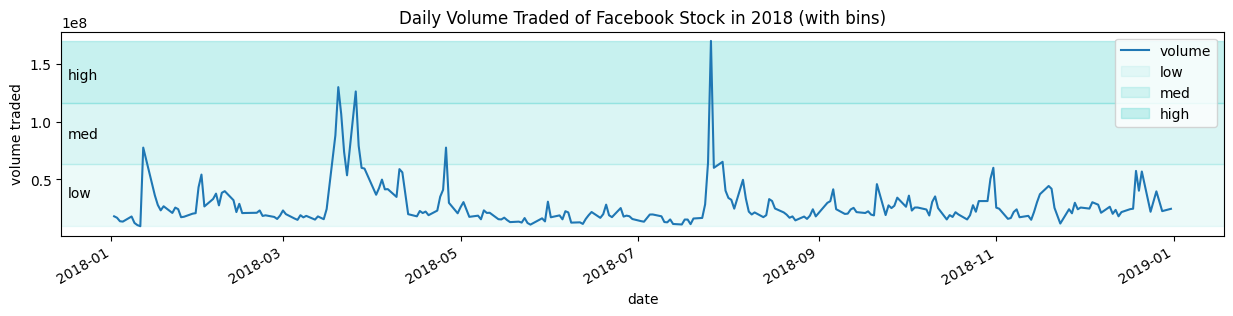

In [101]:
fb.plot(y='volume', figsize=(15, 3), title='Daily Volume Traded of Facebook Stock in 2018 (with bins)')
for bin_name, alpha, bounds in zip(
 ['low', 'med', 'high'], [0.1, 0.2, 0.3], pd.cut(fb.volume, bins=3).unique().categories.values
 ):
 plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
 plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))
plt.ylabel('volume traded')
plt.legend()
plt.show()

In [102]:
volume_qbinned = pd.qcut(fb.volume, q=4, labels=['q1', 'q2', 'q3', 'q4'])
volume_qbinned.value_counts()

q1    63
q2    63
q4    63
q3    62
Name: volume, dtype: int64

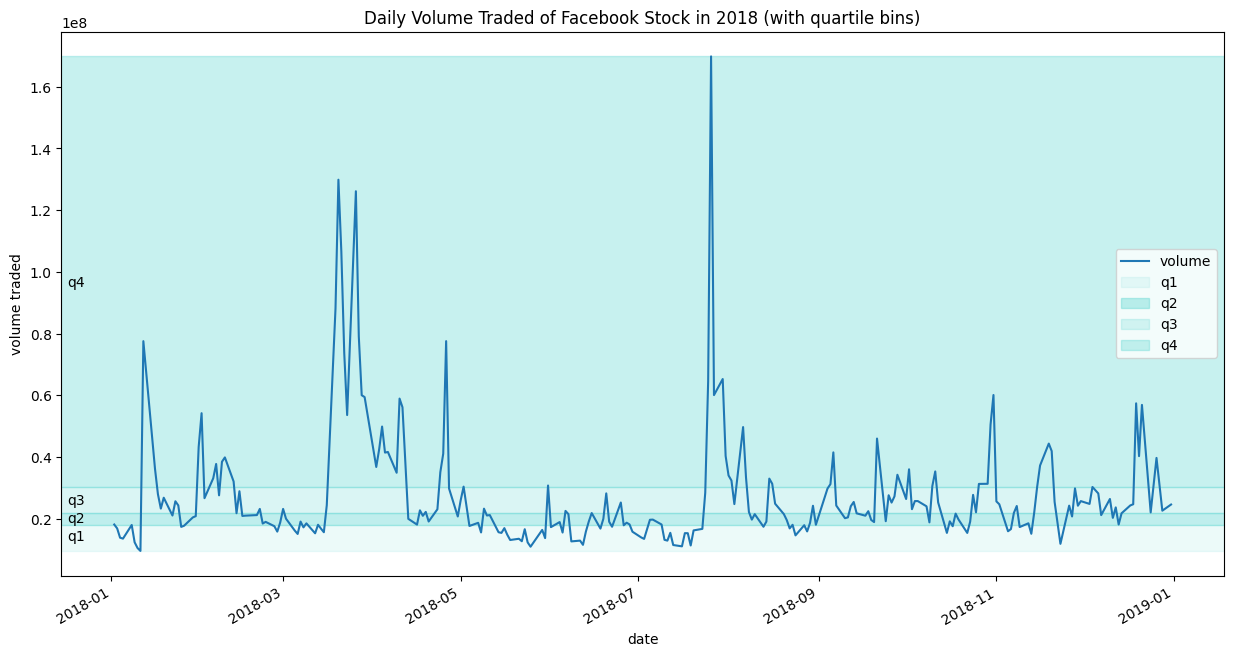

In [103]:
fb.plot(y='volume', figsize=(15, 8), title='Daily Volume Traded of Facebook Stock in 2018 (with quartile bins)')
for bin_name, alpha, bounds in zip(
 ['q1', 'q2', 'q3', 'q4'], [0.1, 0.35, 0.2, 0.3], pd.qcut(fb.volume, q=4).unique().categories.values
 ):
 plt.axhspan(bounds.left, bounds.right, alpha=alpha, label=bin_name, color='mediumturquoise')
 plt.annotate(bin_name, xy=('2017-12-17', (bounds.left + bounds.right)/2.1))
plt.ylabel('volume traded')
plt.legend()
plt.show()

In [105]:
central_park_weather = weather.query(
 'station == "GHCND:USW00094728"'
 ).pivot(index='date', columns='datatype', values='value')
central_park_weather

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT06,WT08
date,,,,,,,,,,,,,,,
2018-01-01,3.5,0.0,0.0,0.0,-7.1,-13.8,300.0,300.0,6.7,11.2,NaN,NaN,NaN,NaN,NaN
2018-01-02,3.6,0.0,0.0,0.0,-3.2,-10.5,260.0,250.0,7.2,12.5,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.4,0.0,0.0,0.0,-1.0,-8.8,260.0,270.0,6.3,9.8,NaN,NaN,NaN,NaN,NaN
2018-01-04,5.6,19.3,249.0,30.0,-1.6,-7.1,310.0,310.0,10.7,19.2,1.0,1.0,NaN,NaN,1.0
2018-01-05,5.8,0.0,0.0,180.0,-7.1,-12.7,280.0,280.0,9.4,15.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,NaN,0.0,0.0,0.0,6.7,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,29.2,0.0,0.0,15.6,6.1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2018-12-29,NaN,0.0,0.0,0.0,13.9,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
central_park_weather.SNOW.clip(0, 1).value_counts()

0.0    354
1.0     11
Name: SNOW, dtype: int64

In [107]:
oct_weather_z_scores = central_park_weather.loc[
 '2018-10', ['TMIN', 'TMAX', 'PRCP']
 ].apply(lambda x: x.sub(x.mean()).div(x.std()))
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.0,-1.790682e-16,1.0,-1.339112,-0.751019,-0.474269,1.065152,1.843511
TMAX,31.0,1.951844e-16,1.0,-1.305582,-0.870013,-0.138258,1.011643,1.604016
PRCP,31.0,4.655774e-17,1.0,-0.394438,-0.394438,-0.394438,-0.240253,3.936167


In [108]:
oct_weather_z_scores.query('PRCP > 3')

datatype,TMIN,TMAX,PRCP
date,,,
2018-10-27,-0.751019,-1.201045,3.936167


In [109]:
central_park_weather.loc['2018-10', 'PRCP'].describe()

count    31.000000
mean      2.941935
std       7.458542
min       0.000000
25%       0.000000
50%       0.000000
75%       1.150000
max      32.300000
Name: PRCP, dtype: float64

In [110]:
import numpy as np
fb.apply(
    lambda x: np.vectorize(lambda y: len(str(np.ceil(y))))(x)
 ).astype('int64').equals(
    fb.applymap(lambda x: len(str(np.ceil(x))))
 )

True

<ipython-input-111-ce1c03ff7dc2>:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in test.iteritems():


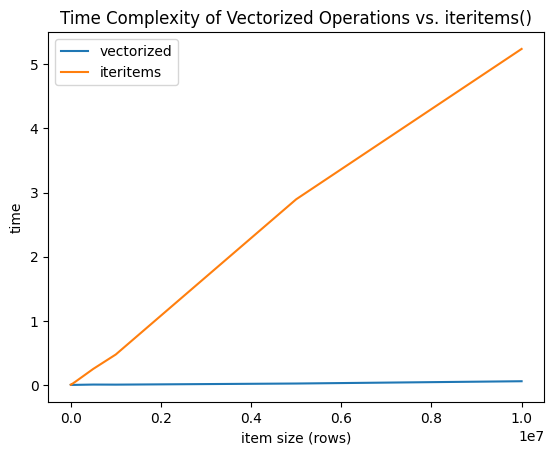

In [111]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(0)
vectorized_results = {}
iteritems_results = {}
for size in [10, 100, 1000, 10000, 100000, 500000, 1000000, 5000000, 10000000]:
    test = pd.Series(np.random.uniform(size=size))

    start = time.time()
    x = test + 10
    end = time.time()
    vectorized_results[size] = end - start

    start = time.time()
    x = []
    for i, v in test.iteritems():
        x.append(v + 10)
    x = pd.Series(x)
    end = time.time()
    iteritems_results[size] = end - start
pd.DataFrame(
    [pd.Series(vectorized_results, name='vectorized'), pd.Series(iteritems_results, name='iteritems')]
 ).T.plot(title='Time Complexity of Vectorized Operations vs. iteritems()')
plt.xlabel('item size (rows)')
plt.ylabel('time')
plt.show()

In [112]:
central_park_weather['2018-10'].assign(
 rolling_PRCP=lambda x: x.PRCP.rolling('3D').sum()
 )[['PRCP', 'rolling_PRCP']].head(7).T

<ipython-input-112-a641b94637ad>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-10'].assign(


date,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07
datatype,,,,,,,
PRCP,0.0,17.5,0.0,1.0,0.0,0.0,0.0
rolling_PRCP,0.0,17.5,17.5,18.5,1.0,1.0,0.0


In [113]:
central_park_weather['2018-10'].rolling('3D').mean().head(7).iloc[:,:6]

<ipython-input-113-2abb37634d3b>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-10'].rolling('3D').mean().head(7).iloc[:,:6]


datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,,
2018-10-01,0.900000,0.000000,0.0,0.0,24.400000,17.200000
2018-10-02,0.900000,8.750000,0.0,0.0,24.700000,17.750000
2018-10-03,0.966667,5.833333,0.0,0.0,24.233333,17.566667
2018-10-04,0.800000,6.166667,0.0,0.0,24.233333,17.200000
2018-10-05,1.033333,0.333333,0.0,0.0,23.133333,16.300000
2018-10-06,0.833333,0.333333,0.0,0.0,22.033333,16.300000
2018-10-07,1.066667,0.000000,0.0,0.0,22.600000,17.400000


In [114]:
central_park_weather['2018-10-01':'2018-10-07'].rolling('3D').agg(
    {'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'}
 ).join( # join with original data for comparison
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
    lsuffix='_rolling'
 ).sort_index(axis=1) # sort columns so rolling calcs are next to originals

datatype,AWND,AWND_rolling,PRCP,PRCP_rolling,TMAX,TMAX_rolling,TMIN,TMIN_rolling
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.800000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,1.033333,0.0,1.0,21.7,24.4,15.6,15.6
2018-10-06,0.5,0.833333,0.0,1.0,20.0,24.4,17.2,15.6
2018-10-07,1.1,1.066667,0.0,0.0,26.1,26.1,19.4,15.6


In [115]:
central_park_weather.PRCP.expanding().sum().equals(central_park_weather.PRCP.cumsum())

False

In [116]:
central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
    {'TMAX': np.max, 'TMIN': np.min, 'AWND': np.mean, 'PRCP': np.sum}
 ).join(
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
    lsuffix='_expanding'
 ).sort_index(axis=1)

datatype,AWND,AWND_expanding,PRCP,PRCP_expanding,TMAX,TMAX_expanding,TMIN,TMIN_expanding
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.825000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,0.980000,0.0,18.5,21.7,25.0,15.6,15.6
2018-10-06,0.5,0.900000,0.0,18.5,20.0,25.0,17.2,15.6
2018-10-07,1.1,0.928571,0.0,18.5,26.1,26.1,19.4,15.6


In [117]:
fb.assign(
    close_ewma=lambda x: x.close.ewm(span=5).mean()
 ).tail(10)[['close', 'close_ewma']]

,close,close_ewma
date,,
2018-12-17,140.19,142.235433
2018-12-18,143.66,142.710289
2018-12-19,133.24,139.553526
2018-12-20,133.40,137.502350
2018-12-21,124.95,133.318234
2018-12-24,124.06,130.232156
2018-12-26,134.18,131.548104
2018-12-27,134.52,132.538736
2018-12-28,133.20,132.759157


In [118]:
def get_info(df):
 return '%d rows and %d columns and max closing z-score was %d' % (*df.shape, df.close.max())
fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()).pipe(get_info)\
 == get_info(fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()))

<ipython-input-118-df4ec8f2b7d9>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()).pipe(get_info)\
<ipython-input-118-df4ec8f2b7d9>:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  == get_info(fb['2018-Q1'].apply(lambda x: (x - x.mean())/x.std()))


True

In [119]:
fb.pipe(pd.DataFrame.rolling, '20D').mean().equals(fb.rolling('20D').mean())

True

In [120]:
pd.DataFrame.rolling(fb, '20D').mean().equals(fb.rolling('20D').mean())

True

In [124]:
from window_calc import window_calc
window_calc??

In [125]:
window_calc(fb, pd.DataFrame.expanding, np.median).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.580,177.5500,181.420,18151903.0
2018-01-03,179.78,183.180,179.4400,183.045,17519233.0
2018-01-04,181.88,184.780,181.3300,184.330,16886563.0
2018-01-05,183.39,185.495,182.7148,184.500,15383729.5
2018-01-08,184.90,186.210,184.0996,184.670,16886563.0


In [126]:
window_calc(fb, pd.DataFrame.ewm, 'mean', span=3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.680000,181.580000,177.550000,181.420000,1.815190e+07
2018-01-03,180.480000,183.713333,180.070000,183.586667,1.730834e+07
2018-01-04,183.005714,185.140000,182.372629,184.011429,1.534980e+07
2018-01-05,184.384000,186.078667,183.736560,185.525333,1.440299e+07
2018-01-08,185.837419,187.534839,185.075110,186.947097,1.625679e+07


In [127]:
window_calc(
 central_park_weather['2018-10'],
pd.DataFrame.rolling,
{'TMAX': 'max', 'TMIN': 'min', 'AWND': 'mean', 'PRCP': 'sum'},
 '3D'
 ).head()

<ipython-input-127-12755c7647d9>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  central_park_weather['2018-10'],


datatype,TMAX,TMIN,AWND,PRCP
date,,,,
2018-10-01,24.4,17.2,0.900000,0.0
2018-10-02,25.0,17.2,0.900000,17.5
2018-10-03,25.0,17.2,0.966667,17.5
2018-10-04,25.0,16.1,0.800000,18.5
2018-10-05,24.4,15.6,1.033333,1.0


# Aggregations with pandas and numpy

In [128]:
import numpy as np
import pandas as pd
weather = pd.read_csv('weather_by_station.csv', index_col='date', parse_dates=True)
weather.head()

,datatype,station,value,station_name
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,0.0,"STAMFORD 4.2 S, CT US"
2018-01-01,PRCP,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0015,0.0,"NORTH ARLINGTON 0.7 WNW, NJ US"
2018-01-01,PRCP,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"
2018-01-01,SNOW,GHCND:US1NJBG0017,0.0,"GLEN ROCK 0.7 SSE, NJ US"


In [130]:
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True).assign(
 trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
 )
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


In [131]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [132]:
fb.agg({
    'open': np.mean,
    'high': np.max,
    'low': np.min,
    'close': np.mean,
    'volume': np.sum
 })

open            171.45
high            218.62
low             123.02
close           171.51
volume   6949682394.00
dtype: float64

In [133]:
weather.query(
    'station == "GHCND:USW00094728"'
 ).pivot(columns='datatype', values='value')[['SNOW', 'PRCP']].sum()

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

In [134]:
weather.query(
    'station == "GHCND:USW00094728"'
 ).pivot(columns='datatype', values='value')[['SNOW', 'PRCP']].agg('sum')

datatype
SNOW   1007.00
PRCP   1665.30
dtype: float64

In [135]:
fb.agg({
    'open': 'mean',
    'high': ['min', 'max'],
    'low': ['min', 'max'],
'close': 'mean'
 })

,open,high,low,close
mean,171.45,NaN,NaN,171.51
min,NaN,129.74,123.02,NaN
max,NaN,218.62,214.27,NaN


In [136]:
fb.groupby('trading_volume').mean()

,open,high,low,close,volume
trading_volume,,,,,
low,171.36,173.46,169.31,171.43,24547207.71
med,175.82,179.42,172.11,175.14,79072559.12
high,167.73,170.48,161.57,168.16,141924023.33


In [137]:
fb.groupby('trading_volume')['close'].agg(['min', 'max', 'mean'])

,min,max,mean
trading_volume,,,
low,124.06,214.67,171.43
med,152.22,217.50,175.14
high,160.06,176.26,168.16


In [138]:
fb_agg = fb.groupby('trading_volume').agg({
 'open': 'mean',
 'high': ['min', 'max'],
 'low': ['min', 'max'],
 'close': 'mean'
 })
fb_agg

open   high           low         close
                 mean    min    max    min    max   mean
trading_volume                                          
low            171.36 129.74 216.20 123.02 212.60 171.43
med            175.82 162.85 218.62 150.75 214.27 175.14
high           167.73 161.10 180.13 149.02 173.75 168.16

In [139]:
fb_agg.columns

MultiIndex([( 'open', 'mean'),
            ( 'high',  'min'),
            ( 'high',  'max'),
            (  'low',  'min'),
            (  'low',  'max'),
            ('close', 'mean')],
           )

In [140]:
fb_agg.columns = ['_'.join(col_agg) for col_agg in fb_agg.columns]
fb_agg.head()

,open_mean,high_min,high_max,low_min,low_max,close_mean
trading_volume,,,,,,
low,171.36,129.74,216.20,123.02,212.60,171.43
med,175.82,162.85,218.62,150.75,214.27,175.14
high,167.73,161.10,180.13,149.02,173.75,168.16


In [141]:
weather['2018-10'].query('datatype == "PRCP"').groupby(
 pd.Grouper(freq='D')
 ).mean().head()

<ipython-input-141-2edf776278e7>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  weather['2018-10'].query('datatype == "PRCP"').groupby(
<ipython-input-141-2edf776278e7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).mean().head()


,value
date,
2018-10-01,0.01
2018-10-02,2.23
2018-10-03,19.69
2018-10-04,0.32
2018-10-05,0.97


In [142]:
weather.query('datatype == "PRCP"').groupby(
 ['station_name', pd.Grouper(freq='Q')]
 ).sum().unstack().sample(5, random_state=1)

<ipython-input-142-a944163fa184>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).sum().unstack().sample(5, random_state=1)


value                                 
date                        2018-03-31 2018-06-30 2018-09-30 2018-12-31
station_name                                                           
WANTAGH 1.1 NNE, NY US          279.90     216.80     472.50     277.20
STATEN ISLAND 1.4 SE, NY US     379.40     295.30     438.80     409.90
SYOSSET 2.0 SSW, NY US          323.50     263.30     355.50     459.90
STAMFORD 4.2 S, CT US           338.00     272.10     424.70     390.00
WAYNE TWP 0.8 SSW, NJ US        246.20     295.30     620.90     422.00

In [143]:
weather.groupby('station').filter( # station IDs with NY in them
 lambda x: 'NY' in x.name
).query('datatype == "SNOW"').groupby('station_name').sum().squeeze() # aggregate and make a series (squeeze)

<ipython-input-143-fc087d3d6699>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).query('datatype == "SNOW"').groupby('station_name').sum().squeeze() # aggregate and make a series (squeeze)


station_name
ALBERTSON 0.2 SSE, NY US         1087.00
AMITYVILLE 0.1 WSW, NY US         434.00
AMITYVILLE 0.6 NNE, NY US        1072.00
ARMONK 0.3 SE, NY US             1504.00
BROOKLYN 3.1 NW, NY US            305.00
CENTERPORT 0.9 SW, NY US          799.00
ELMSFORD 0.8 SSW, NY US           863.00
FLORAL PARK 0.4 W, NY US         1015.00
HICKSVILLE 1.3 ENE, NY US         716.00
JACKSON HEIGHTS 0.3 WSW, NY US    107.00
LOCUST VALLEY 0.3 E, NY US          0.00
LYNBROOK 0.3 NW, NY US            325.00
MASSAPEQUA 0.9 SSW, NY US          41.00
MIDDLE VILLAGE 0.5 SW, NY US     1249.00
NEW HYDE PARK 1.6 NE, NY US         0.00
NEW YORK 8.8 N, NY US               0.00
NORTH WANTAGH 0.4 WSW, NY US      471.00
PLAINEDGE 0.4 WSW, NY US          610.00
PLAINVIEW 0.4 ENE, NY US         1360.00
SADDLE ROCK 3.4 WSW, NY US        707.00
STATEN ISLAND 1.4 SE, NY US       936.00
STATEN ISLAND 4.5 SSE, NY US       89.00
SYOSSET 2.0 SSW, NY US           1039.00
VALLEY STREAM 0.6 SE, NY US       898.00
WAN

In [144]:
weather.query('datatype == "PRCP"').groupby(
 pd.Grouper(freq='D')
 ).mean().groupby(pd.Grouper(freq='M')).sum().value.nlargest()

<ipython-input-144-2dc97428a06f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).mean().groupby(pd.Grouper(freq='M')).sum().value.nlargest()


date
2018-11-30   210.59
2018-09-30   193.09
2018-08-31   192.45
2018-07-31   160.98
2018-02-28   158.11
Name: value, dtype: float64

In [145]:
weather.query('datatype == "PRCP"').rename(
    dict(value='prcp'), axis=1
 ).groupby(pd.Grouper(freq='D')).mean().groupby(
    pd.Grouper(freq='M')
 ).transform(np.sum)['2018-01-28':'2018-02-03']

<ipython-input-145-b5929c835e4b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).groupby(pd.Grouper(freq='D')).mean().groupby(


,prcp
date,
2018-01-28,69.31
2018-01-29,69.31
2018-01-30,69.31
2018-01-31,69.31
2018-02-01,158.11
2018-02-02,158.11
2018-02-03,158.11


In [147]:
weather\
    .query('datatype == "PRCP"')\
    .rename(dict(value='prcp'), axis=1)\
    .groupby(pd.Grouper(freq='D')).mean()\
    .assign(
        total_prcp_in_month=lambda x: x.groupby(
                pd.Grouper(freq='M')
        ).transform(np.sum),
        pct_monthly_prcp=lambda x: x.prcp.div(
            x.total_prcp_in_month
        )
    ).nlargest(5, 'pct_monthly_prcp')

<ipython-input-147-9f4e38c3d7d4>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(pd.Grouper(freq='D')).mean()\


,prcp,total_prcp_in_month,pct_monthly_prcp
date,,,
2018-10-12,34.77,105.63,0.33
2018-01-13,21.66,69.31,0.31
2018-03-02,38.77,137.46,0.28
2018-04-16,39.34,140.57,0.28
2018-04-17,37.30,140.57,0.27


In [148]:
fb[['open', 'high', 'low', 'close']].transform(
    lambda x: (x - x.mean()).div(x.std())
 ).head()

,open,high,low,close
date,,,,
2018-01-02,0.32,0.41,0.41,0.50
2018-01-03,0.53,0.57,0.60,0.66
2018-01-04,0.68,0.65,0.74,0.64
2018-01-05,0.72,0.68,0.78,0.77
2018-01-08,0.80,0.79,0.85,0.84


In [149]:
fb.pivot_table(columns='trading_volume')

trading_volume,low,med,high
close,171.43,175.14,168.16
high,173.46,179.42,170.48
low,169.31,172.11,161.57
open,171.36,175.82,167.73
volume,24547207.71,79072559.12,141924023.33


In [150]:
fb.pivot_table(index='trading_volume')

,close,high,low,open,volume
trading_volume,,,,,
low,171.43,173.46,169.31,171.36,24547207.71
med,175.14,179.42,172.11,175.82,79072559.12
high,168.16,170.48,161.57,167.73,141924023.33


In [151]:
weather.reset_index().pivot_table(
 index=['date', 'station', 'station_name'],
columns='datatype',
values='value',
 aggfunc='median'
 ).reset_index().tail()

datatype,date,station,station_name,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
28740,2018-12-31,GHCND:USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",5.00,NaN,NaN,2052.00,28.70,NaN,NaN,...,15.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28741,2018-12-31,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",NaN,NaN,NaN,NaN,25.90,0.00,0.00,...,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28742,2018-12-31,GHCND:USW00094741,"TETERBORO AIRPORT, NJ US",1.70,NaN,NaN,1954.00,29.20,NaN,NaN,...,8.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28743,2018-12-31,GHCND:USW00094745,"WESTCHESTER CO AIRPORT, NY US",2.70,NaN,NaN,2212.00,24.40,NaN,NaN,...,11.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28744,2018-12-31,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",4.10,NaN,NaN,NaN,31.20,0.00,0.00,...,12.50,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
pd.crosstab(
 index=fb.trading_volume,
 columns=fb.index.month,
 colnames=['month'] # name the columns index
 )

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,20,19,15,20,22,21,18,23,19,23,21,19
med,1,0,4,1,0,0,2,0,0,0,0,0
high,0,0,2,0,0,0,1,0,0,0,0,0


In [153]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],
    normalize='columns'
 )

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,0.95,1.00,0.71,0.95,1.00,1.00,0.86,1.00,1.00,1.00,1.00,1.00
med,0.05,0.00,0.19,0.05,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00
high,0.00,0.00,0.10,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00


In [154]:
pd.crosstab(
    index=fb.trading_volume,
    columns=fb.index.month,
    colnames=['month'],
    values=fb.close,
    aggfunc=np.mean
 )

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.24,180.27,177.07,163.29,182.93,195.27,201.92,177.49,164.38,154.19,141.64,137.16
med,179.37,NaN,164.76,174.16,NaN,NaN,194.28,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.11,NaN,NaN,NaN,176.26,NaN,NaN,NaN,NaN,NaN


In [155]:
snow_data = weather.query('datatype == "SNOW"')
pd.crosstab(
    index=snow_data.station_name,
    columns=snow_data.index.month,
    colnames=['month'],
values=snow_data.value,
 aggfunc=lambda x: (x > 0).sum(),
 margins=True, # show row and column subtotals
 margins_name='total observations of snow' # name the subtotals
 )

month,1,2,3,4,5,6,7,8,9,10,11,12,total observations of snow
station_name,,,,,,,,,,,,,
"ALBERTSON 0.2 SSE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9
"AMITYVILLE 0.1 WSW, NY US",1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3
"AMITYVILLE 0.6 NNE, NY US",3.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
"ARMONK 0.3 SE, NY US",6.00,4.00,6.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,23
"BLOOMINGDALE 0.7 SSE, NJ US",2.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WESTFIELD 0.6 NE, NJ US",3.00,0.00,4.00,1.00,0.00,NaN,0.00,0.00,0.00,NaN,1.00,NaN,9
"WOODBRIDGE TWP 1.1 ESE, NJ US",4.00,1.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11
"WOODBRIDGE TWP 1.1 NNE, NJ US",2.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,7


# Time Series

In [156]:
import numpy as np
import pandas as pd
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True).assign(
 trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
 )
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low
2018-01-08,187.20,188.90,186.33,188.28,17994726,low


In [157]:
fb['2018-10-11':'2018-10-15']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.16,153.35,35338901,low
2018-10-12,156.73,156.89,151.30,153.74,25293492,low
2018-10-15,153.32,155.57,152.55,153.52,15433521,low


In [158]:
fb['2018-q1'].equals(fb['2018-01':'2018-03'])

<ipython-input-158-f01e3c270a70>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fb['2018-q1'].equals(fb['2018-01':'2018-03'])


True

In [159]:
fb.first('1W')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903,low
2018-01-03,181.88,184.78,181.33,184.67,16886563,low
2018-01-04,184.90,186.21,184.10,184.33,13880896,low
2018-01-05,185.59,186.90,184.93,186.85,13574535,low


In [160]:
fb.last('1W')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


In [162]:
stock_data_per_minute = pd.read_csv(
    'fb_week_of_may_20_per_minute.csv', index_col='date', parse_dates=True,
    date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H-%M')
 )
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.00
2019-05-20 09:31:00,182.61,182.61,182.61,182.61,468017.00
2019-05-20 09:32:00,182.75,182.75,182.75,182.75,97258.00
2019-05-20 09:33:00,182.95,182.95,182.95,182.95,43961.00
2019-05-20 09:34:00,183.06,183.06,183.06,183.06,79562.00


In [163]:
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
 })

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.18,181.62,182.72,10044838.00
2019-05-21,184.53,185.58,183.97,184.82,7198405.00
2019-05-22,184.81,186.56,184.01,185.32,8412433.00
2019-05-23,182.50,183.73,179.76,180.87,12479171.00
2019-05-24,182.33,183.52,181.04,181.06,7686030.00


In [164]:
stock_data_per_minute.at_time('9:30')

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.00
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.00
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.00
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.00
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.00


In [165]:
stock_data_per_minute.between_time('15:59', '16:00')

,open,high,low,close,volume
date,,,,,
2019-05-20 15:59:00,182.91,182.91,182.91,182.91,134569.00
2019-05-20 16:00:00,182.72,182.72,182.72,182.72,1113672.00
2019-05-21 15:59:00,184.84,184.84,184.84,184.84,61606.00
2019-05-21 16:00:00,184.82,184.82,184.82,184.82,801080.00
2019-05-22 15:59:00,185.29,185.29,185.29,185.29,96099.00
2019-05-22 16:00:00,185.32,185.32,185.32,185.32,1220993.00
2019-05-23 15:59:00,180.72,180.72,180.72,180.72,109648.00
2019-05-23 16:00:00,180.87,180.87,180.87,180.87,1329217.00
2019-05-24 15:59:00,181.07,181.07,181.07,181.07,52994.00


In [166]:
shares_traded_in_first_30_min = stock_data_per_minute\
 .between_time('9:30', '10:00')\
 .groupby(pd.Grouper(freq='1D'))\
 .filter(lambda x: (x.volume > 0).all())\
 .volume.mean()
shares_traded_in_last_30_min = stock_data_per_minute\
 .between_time('15:30', '16:00')\
 .groupby(pd.Grouper(freq='1D'))\
 .filter(lambda x: (x.volume > 0).all())\
 .volume.mean()
shares_traded_in_first_30_min - shares_traded_in_last_30_min
pd.DataFrame(
 dict(before=stock_data_per_minute.index, after=stock_data_per_minute.index.normalize())
 ).head()

,before,after
0,2019-05-20 09:30:00,2019-05-20
1,2019-05-20 09:31:00,2019-05-20
2,2019-05-20 09:32:00,2019-05-20
3,2019-05-20 09:33:00,2019-05-20
4,2019-05-20 09:34:00,2019-05-20


In [167]:
stock_data_per_minute.index.to_series().dt.normalize().head()

date
2019-05-20 09:30:00   2019-05-20
2019-05-20 09:31:00   2019-05-20
2019-05-20 09:32:00   2019-05-20
2019-05-20 09:33:00   2019-05-20
2019-05-20 09:34:00   2019-05-20
Name: date, dtype: datetime64[ns]

In [168]:
fb.assign(
 prior_close=lambda x: x.close.shift(),
 after_hours_change_in_price=lambda x: x.open - x.prior_close,
 abs_change=lambda x: x.after_hours_change_in_price.abs()
 ).nlargest(5, 'abs_change')


,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


In [169]:
pd.date_range('2018-01-01', freq='D', periods=5) + pd.Timedelta('9 hours 30 minutes')

DatetimeIndex(['2018-01-01 09:30:00', '2018-01-02 09:30:00',
               '2018-01-03 09:30:00', '2018-01-04 09:30:00',
               '2018-01-05 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [170]:
fb['2018-09'].first_valid_index()

<ipython-input-170-d8ca41528993>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fb['2018-09'].first_valid_index()


Timestamp('2018-09-04 00:00:00')

In [171]:
fb['2018-09'].last_valid_index()

<ipython-input-171-ef6e024573c9>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  fb['2018-09'].last_valid_index()


Timestamp('2018-09-28 00:00:00')

In [172]:
fb.index.contains('2018-09-30')

AttributeError: 'DatetimeIndex' object has no attribute 'contains'

In [173]:
fb.asof('2018-09-30')

open                168.33
high                168.79
low                 162.56
close               164.46
volume            34265638
trading_volume         low
Name: 2018-09-30 00:00:00, dtype: object

In [174]:
(
 fb.drop(columns='trading_volume') - fb.drop(columns='trading_volume').shift()
 ).equals(
 fb.drop(columns='trading_volume').diff()
 )

True

In [175]:
fb.drop(columns='trading_volume').diff().head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,4.20,3.20,3.78,3.25,-1265340.00
2018-01-04,3.02,1.43,2.77,-0.34,-3005667.00
2018-01-05,0.69,0.69,0.83,2.52,-306361.00
2018-01-08,1.61,2.00,1.40,1.43,4420191.00


In [176]:
fb.drop(columns='trading_volume').diff(-3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,-7.91,-5.32,-7.38,-5.43,4577368.00
2018-01-03,-5.32,-4.12,-5.00,-3.61,-1108163.00
2018-01-04,-3.80,-2.59,-3.00,-3.54,1487839.00
2018-01-05,-1.35,-0.99,-0.70,-0.99,3044641.00
2018-01-08,-1.20,0.50,-1.05,0.51,8406139.00


In [177]:
import matplotlib.pyplot as plt

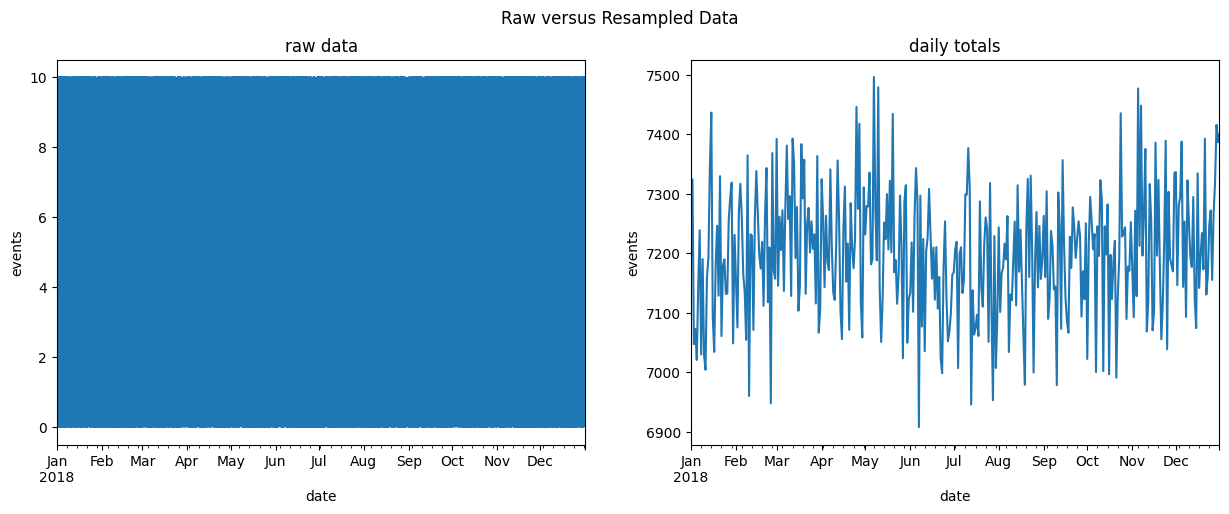

In [178]:
np.random.seed(0)
index = pd.date_range('2018-01-01', freq='T', periods=365*24*60)
raw = pd.DataFrame(
 np.random.uniform(0, 10, size=index.shape[0]), index=index
 )
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
raw.plot(legend=False, ax=axes[0], title='raw data')
raw.resample('1D').sum().plot(legend=False, ax=axes[1], title='daily totals')
for ax in axes:
 ax.set_xlabel('date')
 ax.set_ylabel('events')
plt.suptitle('Raw versus Resampled Data')
plt.show()

In [179]:
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.00
2019-05-20 09:31:00,182.61,182.61,182.61,182.61,468017.00
2019-05-20 09:32:00,182.75,182.75,182.75,182.75,97258.00
2019-05-20 09:33:00,182.95,182.95,182.95,182.95,43961.00
2019-05-20 09:34:00,183.06,183.06,183.06,183.06,79562.00


In [180]:
stock_data_per_minute.resample('1D').agg({
 'open': 'first',
 'high': 'max',
'low': 'min',
'close': 'last',
'volume': 'sum'
 })

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.18,181.62,182.72,10044838.00
2019-05-21,184.53,185.58,183.97,184.82,7198405.00
2019-05-22,184.81,186.56,184.01,185.32,8412433.00
2019-05-23,182.50,183.73,179.76,180.87,12479171.00
2019-05-24,182.33,183.52,181.04,181.06,7686030.00


In [181]:
fb.resample('Q').mean()

<ipython-input-181-f6fd3d834d43>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fb.resample('Q').mean()


,open,high,low,close,volume
date,,,,,
2018-03-31,179.47,181.79,177.04,179.55,32926396.70
2018-06-30,180.37,182.28,178.60,180.70,24055317.75
2018-09-30,180.81,182.89,178.96,181.03,27019824.76
2018-12-31,145.27,147.62,142.72,144.87,26974331.73


In [182]:
fb.drop(columns='trading_volume').resample('Q').apply(
 lambda x: x.last('1D').values - x.first('1D').values
 )

date
2018-03-31    [[-22.53, -20.160000000000025, -23.41000000000...
2018-06-30    [[39.50999999999999, 38.399700000000024, 39.84...
2018-09-30    [[-25.039999999999992, -28.659999999999997, -2...
2018-12-31    [[-28.580000000000013, -31.24000000000001, -31...
Freq: Q-DEC, dtype: object

In [184]:
melted_stock_data = pd.read_csv('melted_stock_data.csv', index_col='date', parse_dates=True)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.62
2019-05-20 09:31:00,182.61
2019-05-20 09:32:00,182.75
2019-05-20 09:33:00,182.95
2019-05-20 09:34:00,183.06


In [185]:
melted_stock_data.resample('1D').ohlc()['price']

,open,high,low,close
date,,,,
2019-05-20,181.62,184.18,181.62,182.72
2019-05-21,184.53,185.58,183.97,184.82
2019-05-22,184.81,186.56,184.01,185.32
2019-05-23,182.50,183.73,179.76,180.87
2019-05-24,182.33,183.52,181.04,181.06


In [186]:
fb.resample('6H').asfreq().head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.00,low
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.00,low


In [187]:
fb.resample('6H').pad().head()

<ipython-input-187-39179f05e435>:1: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  fb.resample('6H').pad().head()


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 12:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 18:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563,low


In [188]:
fb.resample('6H').fillna('nearest').head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 12:00:00,181.88,184.78,181.33,184.67,16886563,low
2018-01-02 18:00:00,181.88,184.78,181.33,184.67,16886563,low
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563,low


In [189]:
fb.resample('6H').asfreq().assign(
 volume=lambda x: x.volume.fillna(0), # put 0 when market is closed
 close=lambda x: x.close.fillna(method='ffill'), # carry forward
 # take the closing price if these aren't available
 open=lambda x: np.where(x.open.isnull(), x.close, x.open),
 high=lambda x: np.where(x.high.isnull(), x.close, x.high),
 low=lambda x: np.where(x.low.isnull(), x.close, x.low)
 ).head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.00,low
2018-01-02 06:00:00,181.42,181.42,181.42,181.42,0.00,NaN
2018-01-02 12:00:00,181.42,181.42,181.42,181.42,0.00,NaN
2018-01-02 18:00:00,181.42,181.42,181.42,181.42,0.00,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.00,low


In [192]:
import sqlite3
with sqlite3.connect('stocks.db') as connection:
    fb_prices = pd.read_sql(
        'SELECT * FROM fb_prices', connection,
        index_col='date', parse_dates=['date']
    )
    aapl_prices = pd.read_sql(
        'SELECT * FROM aapl_prices', connection,
        index_col='date', parse_dates=['date']
    )

In [193]:
fb_prices.index.second.unique()

Int64Index([0], dtype='int64', name='date')

In [194]:
aapl_prices.index.second.unique()

Int64Index([ 0, 52, 36, 34, 55, 35,  7, 12, 59, 17,  5, 20, 26, 23, 54, 49, 19,
            53, 11, 22, 13, 21, 10, 46, 42, 38, 33, 18, 16,  9, 56, 39,  2, 50,
            31, 58, 48, 24, 29,  6, 47, 51, 40,  3, 15, 14, 25,  4, 43,  8, 32,
            27, 30, 45,  1, 44, 57, 41, 37, 28],
           dtype='int64', name='date')

In [195]:
pd.merge_asof(
    fb_prices, aapl_prices,
    left_index=True, right_index=True, # datetimes are in the index
    # merge with nearest minute
    direction='nearest', tolerance=pd.Timedelta(30, unit='s')
 ).head()


,FB,AAPL
date,,
2019-05-20 09:30:00,181.62,183.52
2019-05-20 09:31:00,182.61,NaN
2019-05-20 09:32:00,182.75,182.87
2019-05-20 09:33:00,182.95,182.50
2019-05-20 09:34:00,183.06,182.11


In [196]:
pd.merge_ordered(
 fb_prices.reset_index(), aapl_prices.reset_index()
 ).set_index('date').head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.62,183.52
2019-05-20 09:31:00,182.61,NaN
2019-05-20 09:31:52,NaN,182.87
2019-05-20 09:32:00,182.75,NaN
2019-05-20 09:32:36,NaN,182.50


In [197]:
pd.merge_ordered(
 fb_prices.reset_index(), aapl_prices.reset_index(),
 fill_method='ffill'
 ).set_index('date').head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.62,183.52
2019-05-20 09:31:00,182.61,183.52
2019-05-20 09:31:52,182.61,182.87
2019-05-20 09:32:00,182.75,182.87
2019-05-20 09:32:36,182.75,182.50


**8.1.4 Data Analysis**

 Provide some comments here about the results of the procedures.

**8.1.5 Supplementary Activity**

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:
 . With the earthquakes.csv file, select all the earthquakes in Japan with a magType of mb and a magnitude of 4.9 or greater.
 . Create bins for each full number of magnitude (for example, the first bin is 0-1, the second is 1-2, and so on) with a magType of ml and count how many are in each bin.
 . Using the faang.csv file, group by the ticker and resample to monthly frequency. Make the following aggregations:
 Mean of the opening price
 Maximum of the high price
 Minimum of the low price
 Mean of the closing price
 Sum of the volume traded
 . Build a crosstab with the earthquake data between the tsunami column and the magType column. Rather than showing the frequency count, show the maximum
 magnitude that was observed for each combination. Put the magType along the columns.
 . Calculate the rolling 60-day aggregations of OHLC data by ticker for the FAANG data. Use the same aggregations as exercise no. 3.
 . Create a pivot table of the FAANG data that compares the stocks. Put the ticker in the rows and show the averages of the OHLC and volume traded data.
 . Calculate the Z-scores for each numeric column of Netflix's data (ticker is NFLX) using apply().
 . Add event descriptions:
 Create a dataframe with the following three columns: ticker, date, and event. The columns should have the following values:
 ticker: 'FB'
 date: ['2018-07-25', '2018-03-19', '2018-03-20']
 event: ['Disappointing user growth announced after close.', 'Cambridge Analytica story', 'FTC investigation']
 Set the index to ['date', 'ticker']
 Merge this data with the FAANG data using an outer join
 . Use the transform() method on the FAANG data to represent all the values in terms of the first date in the data. To do so, divide all the values for each ticker by the values
 for the first date in the data for that ticker. This is referred to as an index, and the data for the first date is the base (https:// ec. europa. eu/ eurostat/ statistics- explained/
index. php/ Beginners:Statistical concept -  Index and base year). When data is in this format, we can easily see growth over time. Hint: transform() can take a function name.